# NYC Restaurants - Rodent Analysis

My Python version of the ["[OC] Which type of restaurant has the most rodent violations in NYC?"](https://www.reddit.com/r/dataisbeautiful/comments/qdyvq6/oc_which_type_of_restaurant_has_the_most_rodent/hhppf0p/) `/r/dataisbeautiful` reddit post.

Intended to investigate further and determine if the cuisine type depends on the location within NYC.

**Current Status:** _In Progress_

In [1]:
!pip install sodapy

In [2]:
import pandas as pd
from sodapy import Socrata

In [3]:
# df_orig = pd.read_json('https://data.cityofnewyork.us/resource/43nn-pn8j.json')

In [4]:
%%time
client = Socrata("data.cityofnewyork.us", None)
results = client.get_all("43nn-pn8j")
df_orig = pd.DataFrame.from_records(results)

CPU times: user 5.76 s, sys: 618 ms, total: 6.37 s
Wall time: 1min 41s


In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284148 entries, 0 to 284147
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   camis                  284148 non-null  object
 1   dba                    282699 non-null  object
 2   boro                   284148 non-null  object
 3   building               283773 non-null  object
 4   street                 284148 non-null  object
 5   zipcode                280045 non-null  object
 6   phone                  284120 non-null  object
 7   cuisine_description    280113 non-null  object
 8   inspection_date        284148 non-null  object
 9   action                 280113 non-null  object
 10  violation_code         277217 non-null  object
 11  violation_description  278780 non-null  object
 12  critical_flag          284148 non-null  object
 13  score                  270816 non-null  object
 14  grade                  141532 non-null  object
 15  

In [6]:
df_orig.head()

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,50044701,MEME,Manhattan,607,10 AVENUE,10036,9172620827,Mediterranean,2019-05-02T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.760777667525,-73.994643112416,104,03,012900,1026928,1010720036,MN15
1,50040894,DUNKIN,Bronx,1888,EASTCHESTER ROAD,10461,6468724159,Donuts,2017-10-27T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.851564239385,-73.844046933373,211,13,029600,2046946,2042090015,BX49
2,41642160,FAY DA BAKERY,Queens,4133,KISSENA BOULEVARD,11355,7184608019,Bakery Products/Desserts,2018-11-27T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.758017665781,-73.828666029125,407,20,085300,4309526,4050447501,QN22
3,50087867,DELICIOUS WOK,Queens,5952,SUMMERFIELD ST,11385,7183668882,Chinese,2019-11-21T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Re-inspection,40.699940787714,-73.897356638793,405,34,055700,4086738,4035890029,QN20
4,41104783,BUDEPEST CAFE,Manhattan,1631,2 AVENUE,10028,2123271105,Eastern European,2022-05-02T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.776948272526,-73.952426172216,108,05,014601,1048742,1015300027,MN32


In [7]:
df = df_orig.copy()

In [8]:
df['dba'].value_counts()

DUNKIN                             2961
SUBWAY                             1867
STARBUCKS                          1391
MCDONALD'S                         1295
KENNEDY FRIED CHICKEN               869
                                   ... 
NEW JALAPENO                          1
KARAZISHI BOTAN                       1
NEW KINGS PIZZERIA & RESTAURANT       1
TIPSY SCOOP BROOKLYN                  1
BELLA ROMA PIZZA & PASTA              1
Name: dba, Length: 21681, dtype: int64

In [9]:
ny = df[
    (
        df['inspection_type'].isin([
            'Cycle Inspection / Re-inspection',
            'Pre-permit (Operational) / Re-inspection',
            'Cycle Inspection / Initial Inspection',
            'Pre-permit (Operational) / Initial Inspection'
        ])
        &
        pd.to_numeric(df['score']) <= 13
    )
    |
    (
        df['inspection_type'].isin([
            'Pre-permit (Operational) / Reopening Inspection',
            'Cycle Inspection / Reopening Inspection'
        ])
        &
        df['grade'].isin(['A', 'B', 'C', 'P', 'Z'])
    )   
]

In [10]:
ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284148 entries, 0 to 284147
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   camis                  284148 non-null  object
 1   dba                    282699 non-null  object
 2   boro                   284148 non-null  object
 3   building               283773 non-null  object
 4   street                 284148 non-null  object
 5   zipcode                280045 non-null  object
 6   phone                  284120 non-null  object
 7   cuisine_description    280113 non-null  object
 8   inspection_date        284148 non-null  object
 9   action                 280113 non-null  object
 10  violation_code         277217 non-null  object
 11  violation_description  278780 non-null  object
 12  critical_flag          284148 non-null  object
 13  score                  270816 non-null  object
 14  grade                  141532 non-null  object
 15  

In [11]:
ny

,camis,dba,boro,building,street,zipcode,phone,cuisine_description,inspection_date,action,...,record_date,inspection_type,latitude,longitude,community_board,council_district,census_tract,bin,bbl,nta
0,50044701,MEME,Manhattan,607,10 AVENUE,10036,9172620827,Mediterranean,2019-05-02T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.760777667525,-73.994643112416,104,03,012900,1026928,1010720036,MN15
1,50040894,DUNKIN,Bronx,1888,EASTCHESTER ROAD,10461,6468724159,Donuts,2017-10-27T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.851564239385,-73.844046933373,211,13,029600,2046946,2042090015,BX49
2,41642160,FAY DA BAKERY,Queens,4133,KISSENA BOULEVARD,11355,7184608019,Bakery Products/Desserts,2018-11-27T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.758017665781,-73.828666029125,407,20,085300,4309526,4050447501,QN22
3,50087867,DELICIOUS WOK,Queens,5952,SUMMERFIELD ST,11385,7183668882,Chinese,2019-11-21T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Re-inspection,40.699940787714,-73.897356638793,405,34,055700,4086738,4035890029,QN20
4,41104783,BUDEPEST CAFE,Manhattan,1631,2 AVENUE,10028,2123271105,Eastern European,2022-05-02T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.776948272526,-73.952426172216,108,05,014601,1048742,1015300027,MN32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284143,50108223,THE BEARDED BAKER,Brooklyn,8,SAINT MARKS PLACE,11217,7188585160,Bakery Products/Desserts,2021-10-19T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Pre-permit (Operational) / Initial Inspection,40.682575212196,-73.981932774314,302,33,012700,3336057,3003950003,BK38
284144,41079283,THE BROTHERS CAFE,Queens,3949,43 AVENUE,11104,7183615556,American,2019-10-07T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.745615602458,-73.924504620194,402,26,018101,4002418,4001860042,QN31
284145,50088236,NUAN XIN RICE ROLL,Brooklyn,5901,8TH AVE,11220,7185599511,Chinese,2022-04-04T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.635975426791,-74.009036287664,312,38,010400,3140845,3057070010,BK34
284146,41630064,"DUNKIN',' BASKIN ROBBINS",Queens,8347,PARSONS BOULEVARD,11432,7185269690,Donuts,2018-10-16T00:00:00.000,Violations were cited in the following area(s).,...,2022-05-29T06:00:15.000,Cycle Inspection / Initial Inspection,40.714789750973,-73.807556006909,408,24,045000,4148624,4068620341,QN35


In [12]:
ny['has_mice_rats'] = ny['violation_description'].isin([
        "Evidence of rats or live rats present in facility's food and/or non-food areas.",
        "Evidence of mice or live mice present in facility's food and/or non-food areas."
    ])

In [13]:
cuisines = ny.groupby(['camis','cuisine_description']).size().reset_index()
cuisines = cuisines.set_index('camis')
cuisines.sort_index()

,cuisine_description,0
camis,,
30075445,Bakery Products/Desserts,12
30112340,Hamburgers,9
30191841,Irish,5
40356018,American,4
40356483,Sandwiches,11
...,...,...
50122595,Chinese,2
50122625,Coffee/Tea,4
50122639,Pizza,5


In [14]:
v = ny.groupby('camis')[['has_mice_rats']].max()
v.sort_index()

,has_mice_rats
camis,
30075445,True
30112340,False
30191841,False
40356018,False
40356483,True
...,...
50123492,False
50123493,False
50123494,False


In [15]:
violations = v.join(cuisines, how='inner')
violations['camis'] = violations.index
violations.sort_index()

,has_mice_rats,cuisine_description,0,camis
camis,,,,
30075445,True,Bakery Products/Desserts,12,30075445
30112340,False,Hamburgers,9,30112340
30191841,False,Irish,5,30191841
40356018,False,American,4,40356018
40356483,True,Sandwiches,11,40356483
...,...,...,...,...
50122595,True,Chinese,2,50122595
50122625,False,Coffee/Tea,4,50122625
50122639,False,Pizza,5,50122639


In [16]:
def f(x):
    d = {}
    d['restaurants'] = x['cuisine_description'].count()
    d['with_rodents'] = x['has_mice_rats'].sum()
    return pd.Series(d, index=['restaurants', 'with_rodents'])

agg = violations.groupby('cuisine_description').apply(f)
agg['pct_with_rodents'] = agg['with_rodents'] / agg['restaurants']
agg = agg[agg['restaurants'] > 200]
agg.sort_values('restaurants', ascending=False)

,restaurants,with_rodents,pct_with_rodents
cuisine_description,,,
American,4773,1841,0.385711
Chinese,2138,1182,0.552853
Coffee/Tea,1707,484,0.283538
Pizza,1531,783,0.511430
Italian,948,429,0.452532
Japanese,852,385,0.451878
Mexican,828,413,0.498792
Latin American,795,405,0.509434
Bakery Products/Desserts,772,365,0.472798


<AxesSubplot:ylabel='cuisine_description'>

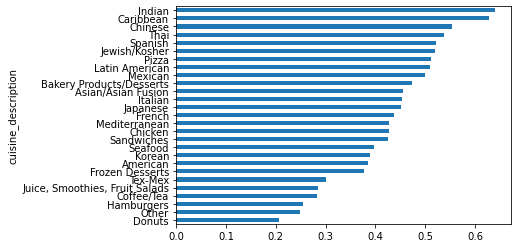

In [17]:
agg.sort_values('pct_with_rodents')['pct_with_rodents'].plot.barh()

### Unsure what I was doing below...

In [18]:
restaurants = df.groupby('cuisine_description')['cuisine_description'].count()
restaurants

cuisine_description
Afghan                  157
African                1776
American              52818
Armenian                  3
Asian/Asian Fusion     4966
                      ...  
Tex-Mex                3363
Thai                   4239
Turkish                 892
Vegan                   492
Vegetarian             1009
Name: cuisine_description, Length: 87, dtype: int64

In [19]:
rodents = df[
    df['violation_description'].isin([
        "Evidence of rats or live rats present in facility's food and/or non-food areas.",
        "Evidence of mice or live mice present in facility's food and/or non-food areas."
    ])
].groupby('cuisine_description')['cuisine_description'].count()
rodents

cuisine_description
Afghan                  13
African                176
American              3685
Asian/Asian Fusion     382
Australian              25
                      ... 
Tex-Mex                208
Thai                   367
Turkish                 80
Vegan                   45
Vegetarian              78
Name: cuisine_description, Length: 84, dtype: int64

In [20]:
dfn = pd.concat([restaurants,rodents], axis=1)
dfn.columns = ['restaurants', 'with_rodents']
dfn['pct_with_rodents'] = dfn['with_rodents'] / dfn['restaurants']
dfn.sort_values('restaurants', ascending=False)

,restaurants,with_rodents,pct_with_rodents
cuisine_description,,,
American,52818,3685.0,0.069768
Chinese,28945,2612.0,0.090240
Pizza,17233,1597.0,0.092671
Coffee/Tea,13648,819.0,0.060009
Latin American,12071,871.0,0.072156
...,...,...,...
Czech,18,1.0,0.055556
Lebanese,10,1.0,0.100000
Basque,10,NaN,NaN
